# 1.	Firstly, replace all Missing values with relevant figures.

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df =pd.read_csv("Dataset_Day8.csv")

display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


None

In [17]:
#Displaying missing values
Missing_value= (df[["Glucose","BloodPressure","BMI","DiabetesPedigreeFunction"]] == 0).sum()
print("% of Missing values in")
print(Missing_value/len(df)*100)

% of Missing values in
Glucose                     0.651042
BloodPressure               4.557292
BMI                         1.432292
DiabetesPedigreeFunction    0.000000
dtype: float64


In [18]:
# Replace missing values with median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df_Nomv=df
dfx=df

# 2.	Then remove all existing outliers and get the final data for classification

In [6]:
def remove_outliers(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3 - Q1
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

columns_to_check = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
data_clean = remove_outliers(data, columns_to_check)

print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_clean.shape)

Original dataset shape: (768, 7)
Cleaned dataset shape: (720, 7)


# 3.	Split the data into 70% training and 30% testing data. Then, use a k-Nearest Neighbor algorithm with target variable as ‘Outcome’.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
import math

X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=23)

k_start = int(math.sqrt(len(X_train)))
print("starting value of k is taken as ", k_start)
metric_start = 'euclidean' 

knn = KNeighborsClassifier(n_neighbors = k_start, metric = metric_start)

#fit the model
knn.fit(X_train,y_train)

#predict using model
y_pred = knn.predict(X_test)

starting value of k is taken as  23


# a.	Print the default model performance metrics: Accuracy, Precision, Recall, F1Score

In [20]:
print("Model performance for starting value of k are obtained as below,\n")
print("Accuracy is", accuracy_score(y_test,y_pred))
print("Precision is",precision_score(y_test,y_pred))
print("Recall is", recall_score(y_test,y_pred))
print("F1_score is", f1_score(y_test,y_pred))

Model performance for starting value of k are obtained as below,

Accuracy is 0.7402597402597403
Precision is 0.6825396825396826
Recall is 0.5180722891566265
F1_score is 0.589041095890411


# b.	Plot a Precision & Recall vs k(no. of neighbours) curve (both Prec and Rec on the same graph). Find the k for which F1-score is the highest. Use any one Distance Metric for this problem.

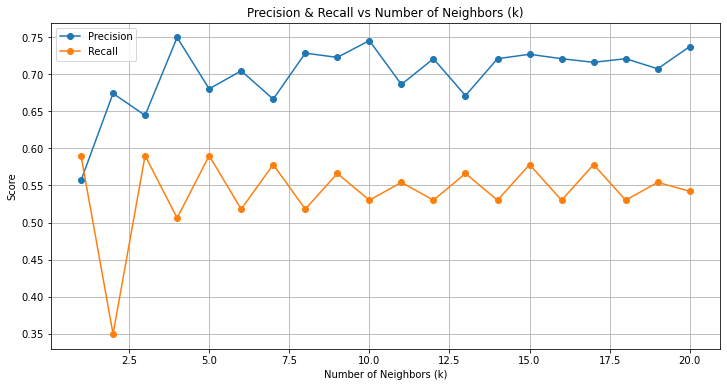

The best k value is 15 with an F1-score of 0.6443


In [21]:
# Initialize lists to store metrics
k_values = list(range(1, 21))
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric_start)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot Precision and Recall vs k
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Precision & Recall vs Number of Neighbors (k)')
plt.legend()
plt.grid()
plt.show()

# Find the k for which F1-score is highest
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"The best k value is {best_k} with an F1-score of {best_f1:.4f}")

In [ ]:
# Observations

 Precision is high i.e generally above 0.65

 Precision has less fluctuation

 Recall has more fluctuation and ranges from 0.35 to 0.50

 Best k value is 15 

# c.	Find the best distance metric, no. of neighbors combination for the kNN algorithm. (do not plot any curve)

In [22]:
k_values = np.arange(4,int(len(X_train)/2),1)

metric_values = ['euclidean']

PerfMatrix = []
for dist in metric_values:
    for k in k_values:

        knn = KNeighborsClassifier(n_neighbors = k, metric = dist)
        knn = knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)

        row = [k,dist,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
        PerfMatrix.append(row)

PerfMatrix = pd.DataFrame(PerfMatrix,columns=['k - Nearest Neighbors','Distance Metric','Accuracy','Precision','Recall','F1-Score'])
display(PerfMatrix)

,k - Nearest Neighbors,Distance Metric,Accuracy,Precision,Recall,F1-Score
0,4,euclidean,0.761905,0.750000,0.506024,0.604317
1,5,euclidean,0.753247,0.680556,0.590361,0.632258
2,6,euclidean,0.748918,0.704918,0.518072,0.597222
3,7,euclidean,0.744589,0.666667,0.578313,0.619355
4,8,euclidean,0.757576,0.728814,0.518072,0.605634
...,...,...,...,...,...,...
259,263,euclidean,0.740260,0.744681,0.421687,0.538462
260,264,euclidean,0.740260,0.744681,0.421687,0.538462
261,265,euclidean,0.740260,0.744681,0.421687,0.538462
262,266,euclidean,0.740260,0.744681,0.421687,0.538462


In [12]:
idx = PerfMatrix[PerfMatrix['F1-Score'] == PerfMatrix['F1-Score'].max()].index
PerfMatrix.loc[idx]

,k - Nearest Neighbors,Distance Metric,Accuracy,Precision,Recall,F1-Score
11,15,euclidean,0.770563,0.727273,0.578313,0.644295


# Observations

k-Value: The model uses 15 nearest neighbors (k=15).

 Distance Metric: Euclidean distance is used as the metric for measuring similarity.

 Accuracy: The model achieves an accuracy of 0.770563, indicating it correctly predicts about 77% of the instances.

 recision: The precision is 0.727273, showing that 72.72% of the predicted positive instances are correct.

 Recall: The recall is 0.578313, meaning the model correctly identifies 57.83% of all actual positive instances.

 F1-Score: The F1-score is 0.644295, which balances precision and recall, indicating moderate overall performance.

In [23]:
k_values = np.arange(4,int(len(X_train)/2),1)

metric_values = ['cosine']

PerfMatrix = []
for dist in metric_values:
    for k in k_values:

        knn = KNeighborsClassifier(n_neighbors = k, metric = dist)
        knn = knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)

        row = [k,dist,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
        PerfMatrix.append(row)

PerfMatrix = pd.DataFrame(PerfMatrix,columns=['k - Nearest Neighbors','Distance Metric','Accuracy','Precision','Recall','F1-Score'])
display(PerfMatrix.head())

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

,k - Nearest Neighbors,Distance Metric,Accuracy,Precision,Recall,F1-Score
0,4,cosine,0.688312,0.648649,0.289157,0.400000
1,5,cosine,0.701299,0.625000,0.421687,0.503597
2,6,cosine,0.688312,0.634146,0.313253,0.419355
3,7,cosine,0.705628,0.627119,0.445783,0.521127
4,8,cosine,0.696970,0.675676,0.301205,0.416667


In [24]:
idx = PerfMatrix[PerfMatrix['F1-Score'] == PerfMatrix['F1-Score'].max()].index
PerfMatrix.loc[idx]

,k - Nearest Neighbors,Distance Metric,Accuracy,Precision,Recall,F1-Score
7,11,cosine,0.735931,0.703704,0.457831,0.554745


# Observations
 k-Value: The model uses 11 nearest neighbors (k=11).
        
 Distance Metric: Cosine distance is used as the metric for measuring similarity.
    
 Accuracy: The model achieves an accuracy of 0.735931, indicating it correctly predicts about 73.59% of the instances.
    
 Precision: The precision is 0.703704, showing that 70.37% of the predicted positive instances are correct.
    
 Recall: The recall is 0.457831, meaning the model correctly identifies 45.78% of all actual positive instances.
    
 F1-Score: The F1-score is 0.554745, which balances precision and recall, indicating moderate overall performance.